In [1]:
import pandas as pd
from pandas import DataFrame,Series
import seaborn as sns
import matplotlib as plt
import scipy
import Advanced_Features
%matplotlib inline

In [2]:
Reg_Season_Rating = pd.read_csv("basketball_csvs/Regular_Season_Team_Rating.csv")
Champions = pd.read_csv("basketball_csvs/Champions.csv")
Playoff_elim = pd.read_csv("basketball_csvs/playoff_elim.csv")
per100_stats = pd.read_csv("basketball_csvs/per_poss_all.csv")
All_stats = pd.read_csv("basketball_csvs/per_game_all.csv")

In [3]:
All_stats['Assist_Ratio'] = All_stats[['AST_game','FGA_game','FTA_game','TOV_game']].apply(Advanced_Features.assist_ratio,axis=1)

In [4]:
All_stats['Pythagorean_Winning_Percentage'] = All_stats[['PTS_game','PTS_opp_game']].apply(Advanced_Features.Pythagorean_Winning_Percentage,axis=1)

In [5]:
All_stats['Efficiency_Differential']=Reg_Season_Rating[['ORtg','DRtg']].apply(Advanced_Features.Efficiency_Differential,axis=1)

In [6]:
All_stats['Defensive_Rebounding_Percentage'] = All_stats[['DRB_game','ORB_opp_game']].apply(Advanced_Features.Defensive_Rebouding_Percentage,axis=1)


In [7]:
All_stats['Possessions_game'] = All_stats[['FGA_game','TOV_game','FTA_game','ORB_game']].apply(Advanced_Features.possessions,axis=1)

In [8]:
All_stats['Possessions_opp_game'] = All_stats[['FGA_opp_game','TOV_opp_game','FTA_opp_game','ORB_opp_game']].apply(Advanced_Features.possessions,axis=1)

In [9]:
All_stats['Offensive_Rebounding_Percentage'] = All_stats[['ORB_game','DRB_opp_game']].apply(Advanced_Features.Offensive_Rebounding_Percentage,axis=1)

In [10]:
All_stats['Pace'] = All_stats[['MP_game','Possessions_game','Possessions_opp_game']].apply(Advanced_Features.pace,axis=1)

In [11]:
All_stats['Play_Percentage'] = All_stats[['FG_game','FGA_game','ORB_game','TOV_game']].apply(Advanced_Features.play_percentage,axis=1)

In [12]:
All_stats['Turnover_Ratio'] = All_stats[['TOV_game','FGA_game','FTA_game','AST_game','TOV_game']].apply(Advanced_Features.Turnover_Ratio,axis=1)

In [13]:
Advanced_features = All_stats[['Year','Team_game','Assist_Ratio',
                              'Pythagorean_Winning_Percentage','Efficiency_Differential',
                              'Defensive_Rebounding_Percentage','Possessions_game','Possessions_opp_game',
                              'Offensive_Rebounding_Percentage','Pace','Play_Percentage','Turnover_Ratio']]

In [14]:
Advanced_features.tail()

,Year,Team_game,Assist_Ratio,Pythagorean_Winning_Percentage,Efficiency_Differential,Defensive_Rebounding_Percentage,Possessions_game,Possessions_opp_game,Offensive_Rebounding_Percentage,Pace,Play_Percentage,Turnover_Ratio
902,2017,Sacramento Kings,17.380960,0.351058,-5.47,0.761792,94.32192,93.83808,0.209639,93.148515,0.430682,11.278312
903,2017,San Antonio Spurs*,18.226375,0.762897,-5.85,0.775744,92.90880,93.26592,0.239808,92.509178,0.451206,10.261908
904,2017,Toronto Raptors*,14.628206,0.663163,-7.03,0.763466,93.47328,93.95712,0.249412,93.248955,0.453179,10.042066
905,2017,Utah Jazz*,16.304877,0.657400,-6.73,0.789720,90.02496,90.43968,0.232099,89.895213,0.442055,11.032155
906,2017,Washington Wizards*,17.726814,0.568135,-6.88,0.754630,96.59904,96.43008,0.240654,95.677383,0.454345,10.532249


In [15]:
def asterisk (name):
    if "*" in name:
        return name[:(len(name)-1)]
    else:
        return name

In [16]:
Pace_Average = DataFrame()
for i in range (1986,2018):
    temp_df = Advanced_features[['Pace','Year']][Advanced_features['Year'] == i]
    temp_df['Pace_Average'] = temp_df.Pace.mean()
    Pace_Average = Pace_Average.append(temp_df)

In [17]:
Advanced_features= pd.concat([Advanced_features,Pace_Average['Pace_Average']],axis=1)
Advanced_features['Team_game'] = Advanced_features['Team_game'].apply(asterisk)

In [18]:
Advanced_features.rename (columns={"Team_game":"Team"},inplace=True)

In [19]:
Advanced_features['Pace_Differential'] = Advanced_features['Pace']-Advanced_features['Pace_Average']

In [20]:
Advanced_features['Possessions_Differential'] = Advanced_features['Possessions_game']-Advanced_features['Possessions_opp_game']

In [30]:
Advanced_features
Advanced_features.to_csv("basketball_csvs/advanced_features.csv", index= False)

In [22]:
Unadjusted_Reg_Season_Rating = Reg_Season_Rating.drop(columns = ['Conf','Div','W','L','MOV/A','ORtg/A','DRtg/A','NRtg/A'])
Adjusted_Reg_Season_Rating=Reg_Season_Rating.drop(columns = ['Conf','Div','W','L','MOV','ORtg','DRtg','NRtg'])

In [23]:
Adjusted_Reg_Season_Rating.tail()

,Rank,Team,W/L%,MOV/A,ORtg/A,DRtg/A,NRtg/A,Year
902,26,Phoenix Suns,0.293,-5.14,107.43,112.41,-4.98,2017
903,27,Philadelphia 76ers,0.341,-5.83,103.92,109.91,-5.99,2017
904,28,Los Angeles Lakers,0.317,-6.29,106.96,113.38,-6.42,2017
905,29,Brooklyn Nets,0.244,-6.74,104.63,111.37,-6.74,2017
906,30,Orlando Magic,0.354,-6.61,104.30,111.21,-6.92,2017


In [24]:
Advanced_features = pd.merge(Advanced_features,Adjusted_Reg_Season_Rating, on=['Team','Year'])

In [25]:
Advanced_features
Advanced_features.to_csv("basketball_csvs/advanced_features.csv", index  =False)

In [26]:
Playoff_elim.Year=Playoff_elim.Year.astype(int)
Playoff_elim.head()
Playoff_elim.rename(columns={'Teams':'Team'},inplace=True)

In [27]:
Unadjusted_Reg_Season_Rating = pd.merge(Unadjusted_Reg_Season_Rating,Playoff_elim, on=['Team','Year'])
Advanced_features = pd.merge(Advanced_features,Playoff_elim, on=['Team','Year'])

In [28]:
Advanced_features.columns

Index(['Year', 'Team', 'Assist_Ratio', 'Pythagorean_Winning_Percentage',
       'Efficiency_Differential', 'Defensive_Rebounding_Percentage',
       'Possessions_game', 'Possessions_opp_game',
       'Offensive_Rebounding_Percentage', 'Pace', 'Play_Percentage',
       'Turnover_Ratio', 'Pace_Average', 'Pace_Differential',
       'Possessions_Differential', 'Rank', 'W/L%', 'MOV/A', 'ORtg/A', 'DRtg/A',
       'NRtg/A', 'Position'],
      dtype='object')

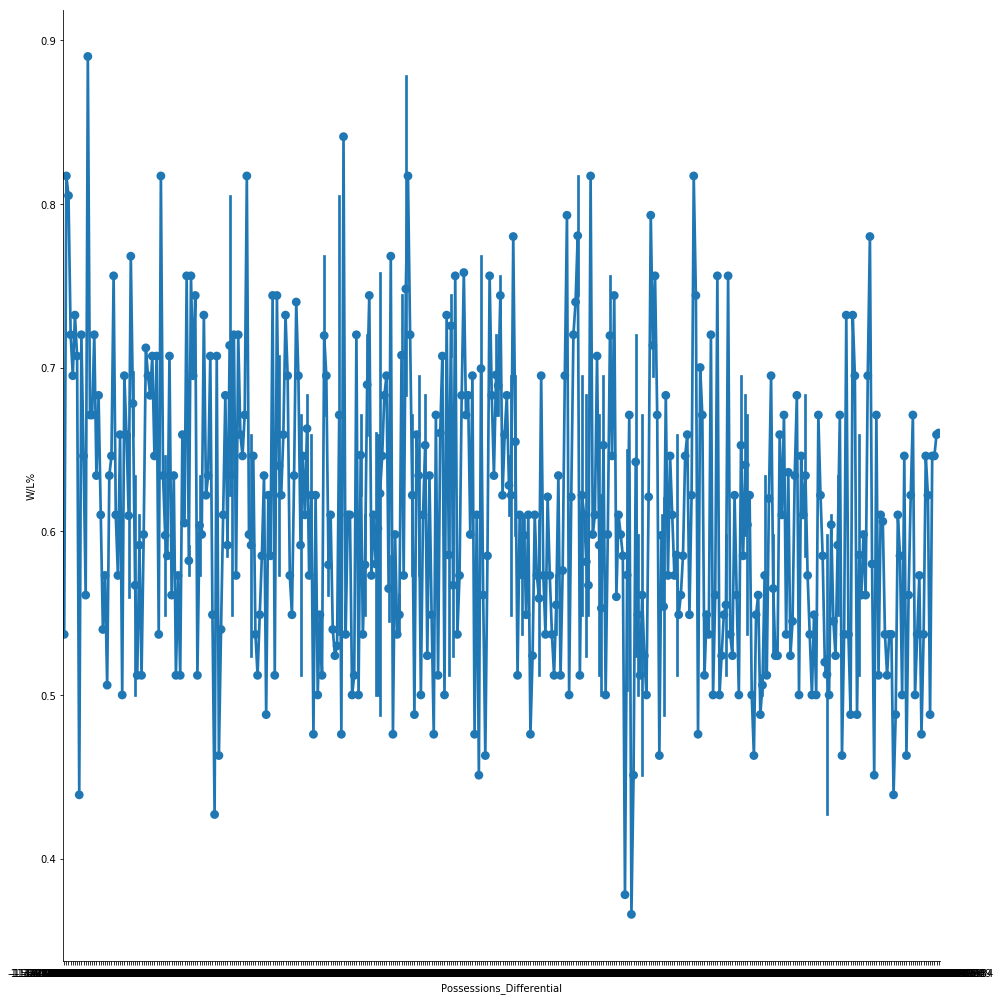

In [29]:
sns.factorplot(x='Possessions_Differential',y='W/L%',data=Advanced_features,size=14)